In [1]:

from astropy.io import ascii
import astropy.table as table
import os 
import numpy as np 
import pandas
import glob
import matplotlib.pyplot as plt
import sys 
path = '/home/idoi/Dropbox/Objects/ZTF22aasxgjp/public code/to upload/'
sys.path.append(path) 
from PhotoUtils import *
plt.rcParams.update({
  "text.usetex": True,
})




data22oqm = ascii.read(path+'test_files/2022oqm_photometry.txt')
data22oqm = data22oqm[data22oqm['isdet'] == 'True']
data22oqm = data22oqm[data22oqm['t'] > 0]
z = 0.0113
data22oqm['t_rest'] = data22oqm['t']/(1+z)

#KAIT = ascii.read(path+'test_files/KAIT_formatted.dat')
#data22oqm = table.vstack([data22oqm,KAIT])
data22oqm.sort('t')
filt_list = np.unique(data22oqm['filter'])




In [2]:

phot = {}
phot['2022oqm'] = data22oqm
phot['2020bvc'] = ascii.read(path+'test_files/SN2020bvc_ebv_corr_all.ascii')
phot['2020bvc']['t'] = phot['2020bvc']['jd'] - 2458883.17
phot['2020bvc']['t_rest'] = phot['2020bvc']['t']/1.025235
phot['2006aj' ] =  ascii.read(path+'test_files/SN2006aj_ebv_corr_all.ascii')
phot['2020oi' ] =  ascii.read(path+'test_files/2020oi_phot.txt')
oi_v2 = ascii.read(path+'test_files/formatted_2020oi_rhoetal.txt')
phot['2020oi' ] = table.vstack([phot['2020oi' ][oi_v2.colnames],oi_v2])
phot['2020oi' ].sort('jd')
phot['2018gep'] = ascii.read(path+'test_files/2018gep_photometry.txt')
phot['2018gep']['t'] = phot['2018gep']['jd'] - 2458370.6673
phot['2018gep']['t_rest'] = phot['2018gep']['t']/1.03154
phot['2019hgp'] = ascii.read(path+'test_files/2019hgp_photometry.txt')
phot['2019hgp']['t'] = phot['2019hgp']['jd'] - 2458641.6
phot['2019hgp']['t_rest'] = phot['2019hgp']['t']/1.0641

phot['2014ft' ] =  ascii.read(path+'test_files/SN2014ft_ebv_corr_all.ascii')
phot['2020scb' ] =  ascii.read(path+'test_files/SN2020scb_ebv_corr_all.ascii')
phot['2021csp' ] =  ascii.read(path+'test_files/SN2021csp_ebv_corr_all.ascii')
phot['2021gno'] = ascii.read(path+'test_files/formatted_2021gno_det.ascii')
phot['2021gno']['t_rest'] = phot['2021gno']['t']

phot['2007gr'] = ascii.read(path+'test_files/2007gr_phot.txt')
phot['2007gr']['t'] = np.nan
phot['2012hn'] = ascii.read(path+'test_files/2012hn_phot.txt')
phot['2012hn']['t'] = phot['2012hn']['jd'] - np.min(phot['2012hn']['jd'])-10
phot['2019ehk'] = ascii.read(path+'test_files/formatted_2019ehk_det.ascii')



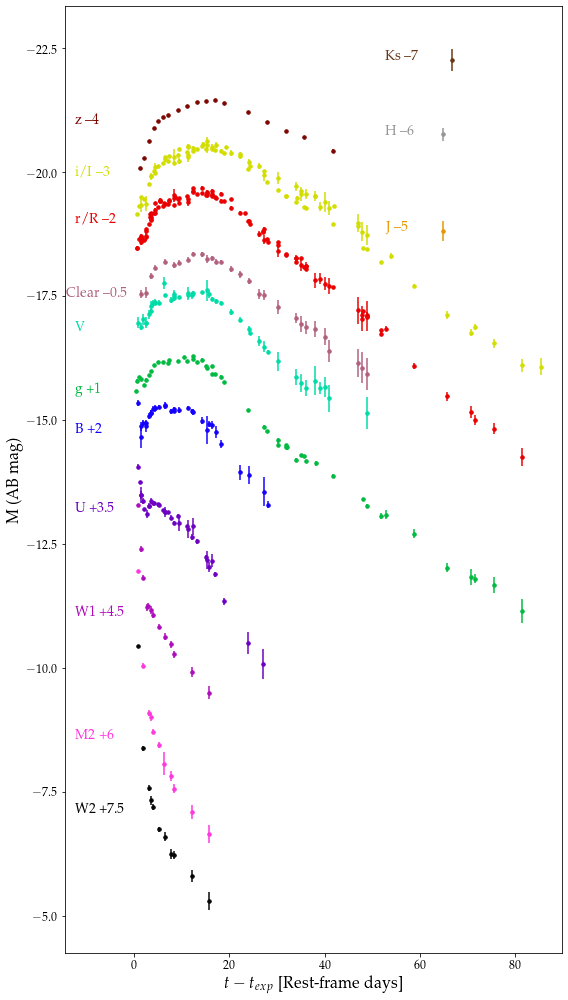

In [3]:

c_band = {'UVW2':'#060606'
         ,'UVM2':'#FF37DE'
         ,'UVW1':'#AE0DBB'
         ,'u_swift':'#6D00C2'
         ,'b_swift':'#1300FF'
         ,'ZTF_g':'#00BA41'
         ,'v_swift':'#00DCA7'
         ,'u_P60': '#6D00C2'
         ,'g_P60':'#00BA41'
         ,'r_P60':'#EA0000'
         ,'i_P60':'#D3DE00'
         ,'ZTF_r':'#EA0000'
         ,'ZTF_i':'#D3DE00'
         ,'LT_u':'#6D00C2'
         ,'LT_z':'#7E0600'      
         ,'LT_g':'#00BA41'
         ,'LT_r':'#EA0000'
         ,'LT_i':'#D3DE00'
         ,'KAIT_B':'#1300FF'
         ,'KAIT_V':'#00DCA7'
         ,'KAIT_R':'#EA0000'
         ,'KAIT_CLEAR':'#B2607E'
         ,'KAIT_I':'#D3DE00'
         ,'Ni_B':'#1300FF'
         ,'Ni_V':'#00DCA7'
         ,'Ni_R':'#EA0000'
         ,'Ni_CLEAR':'#B2607E'
         ,'Ni_I':'#D3DE00'
         ,'MMIRS_J':'#E79600'
         ,'MMIRS_H':'#969696'
         ,'MMIRS_Ks':'#6C3613'}



lab_band = {'UVW2':'W2'
           ,'UVM2':'M2'
           ,'UVW1':'W1'
           ,'u_swift':'U'
           ,'b_swift':''
           ,'ZTF_g':''
           ,'g_P60':''
           ,'v_swift':''
           ,'r_P60':''
           ,'u_P60':''
           ,'ZTF_r':''
           ,'ZTF_i':''
           ,'i_P60':''
           ,'LT_z':'z'     
           ,'LT_u':''
           ,'LT_g':'g'  
           ,'LT_r':'r/R'
           ,'LT_i':'i/I'
         ,'KAIT_B':'B'
         ,'KAIT_V':'V'
         ,'KAIT_R':''
         ,'KAIT_I':''
         ,'KAIT_CLEAR':'Clear'
         ,'KAIT_I':''
         ,'Ni_B':''
         ,'Ni_V':''
         ,'Ni_R':''
         ,'Ni_CLEAR':''
         ,'Ni_I':''
         ,'MMIRS_J':'J'
         ,'MMIRS_H':'H'
         ,'MMIRS_Ks':'Ks'}  

offset   = {'UVW2':-7.5
           ,'UVM2':-6
           ,'UVW1':-4.5
           ,'u_swift':-3.5
           ,'u_P60':-3.5
           ,'LT_u':-3.5
           ,'KAIT_B':-2
           ,'Ni_B':-2
           ,'b_swift':-2
           ,'ZTF_g':-1
           ,'g_P60':-1
           ,'LT_g':-1 
           ,'v_swift':0
           ,'KAIT_V':0
           ,'Ni_V':0
           ,'r_P60':2
           ,'ZTF_r':2
           ,'Ni_R':2
           ,'KAIT_R':2
           ,'LT_r':2
           ,'KAIT_CLEAR':0.5
           ,'Ni_CLEAR':0.5
           ,'ZTF_i':3
           ,'KAIT_I':3
           ,'i_P60':3
           ,'LT_i':3
           ,'KAIT_I':3
           ,'Ni_I':3
           ,'LT_z':4
           ,'MMIRS_J':5
           ,'MMIRS_H':6
           ,'MMIRS_Ks':7}


LOC   = {'UVW2':0
           ,'UVM2':0
           ,'UVW1':0
           ,'u_swift':0
           ,'u_P60':0
           ,'LT_u':0
           ,'KAIT_B':0
           ,'Ni_B':0
           ,'b_swift':0
           ,'ZTF_g':0
           ,'g_P60':0
           ,'LT_g':0 
           ,'v_swift':0
           ,'KAIT_V':0
           ,'Ni_V':0
           ,'r_P60':0
           ,'ZTF_r':0
           ,'Ni_R':0
           ,'KAIT_R':0
           ,'LT_r':0
           ,'KAIT_CLEAR':-2
           ,'Ni_CLEAR':-2
           ,'ZTF_i':0
           ,'KAIT_I':0
           ,'i_P60':0
           ,'LT_i':0
           ,'KAIT_I':0
           ,'Ni_I':0
           ,'LT_z':0
           ,'MMIRS_J': 65
           ,'MMIRS_H': 65
           ,'MMIRS_Ks':65}

cond_dic = {}
for band in filt_list:
    cond_dic[band] = (data22oqm['filter']==band)&(data22oqm['t']>0)


import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

plt.figure(figsize = (8,14))

for i,band in enumerate(filt_list):
    if np.sum(cond_dic[band])>0:
        plt.errorbar(data22oqm['t_rest'][cond_dic[band]], data22oqm['absmag'][cond_dic[band]]-offset[band],data22oqm['AB_MAG_ERR'][cond_dic[band]],marker = '.', ls = '',color = c_band[band], markersize = 7)
        if np.sign(-offset[band]) == 1:
            string = lab_band[band]+' +{0}'.format(-offset[band])
        elif np.sign(-offset[band]) == -1:
            string = lab_band[band]+' -{0}'.format(-offset[band])
        elif np.sign(-offset[band]) == 0:
            string = lab_band[band]
        if lab_band[band]!='':
            plt.text(LOC[band]-12.3,np.mean(data22oqm['absmag'][cond_dic[band]]-offset[band]),string, color =c_band[band], fontsize  = 14 )
plt.gca().invert_yaxis()
plt.xlabel('$t - t_{exp}$ [Rest-frame days]', fontsize  = 16)
plt.ylabel('M (AB mag)', fontsize  = 16)
plt.xlim((-14.5,1.05*np.max(data22oqm['t_rest'])))
plt.tight_layout()
plt.show(block = False)



/home/idoi/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/idoi/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/home/idoi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


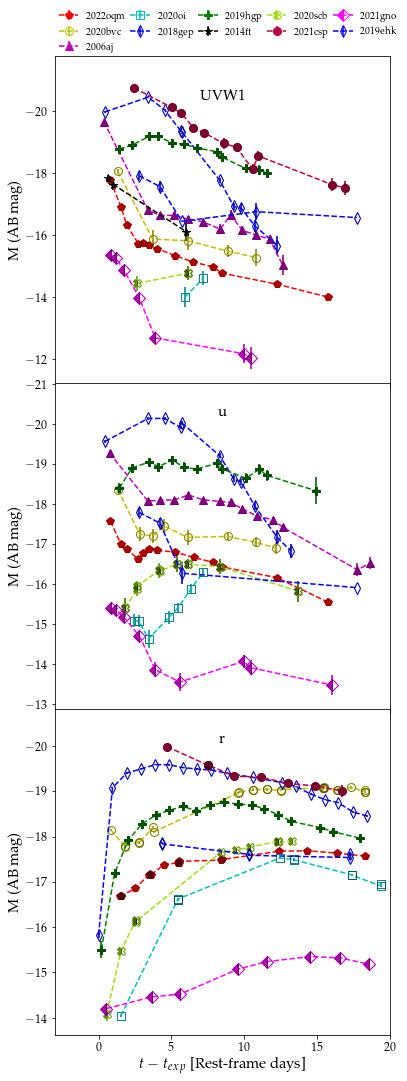

In [4]:




c_sn = {'2019ehk':'b',
        '2022oqm':'r',
        '2007gr':'g',
        '2020bvc':'y',
        '2020oi':'c',
        '2006aj':'m',
        '2014ft':'k',
        '2020scb':'#9EDF13',
        '2021csp':'#FFA500',
        '2021gno':'#FF00FF',
        '2012hn':'#6F49BB'
        ,'2019hgp': 'g'
        ,'2021csp':'#B80043'
        ,'2018gep':'b'}


m_sn =   {'2006aj':'^'
         ,'2014ft':'*'
         ,'2019hgp':'P'
         ,'2022oqm':'p'
         ,'2020bvc':'o'
         ,'2018gep':'d'
         ,'2020oi':'s'
         ,'2020scb':'X'
         ,'2021csp':'o'
         ,'2021gno':'D'
         ,'2007gr':'h'
         ,'2019ehk':'d'
         ,'2012hn':'s'}


f_sn =   {'2006aj' :'full'
         ,'2014ft' :'full'
         ,'2019hgp':'full'
         ,'2022oqm':'full'
         ,'2020bvc':'none'
         ,'2018gep':'none'
         ,'2020oi' :'none'
         ,'2020scb':'left'
         ,'2021csp':'full'
         ,'2021gno':'left'
         ,'2007gr':'right'
          ,'2019ehk':'none'
          ,'2012hn':'left'}

cond_phot = {}
cond_nd = {}

for sn in phot.keys():
    cond_dic_phot = {}
    for band in filt_list:
        cond_dic_phot[band] = (phot[sn]['filter']==band)&(phot[sn]['t']>0)&(phot[sn]['t']<20)&(phot[sn]['isdet']=='True')
    cond_phot[sn] = cond_dic_phot
for sn in phot.keys():
    cond_dic_nd = {}
    for band in filt_list:
        cond_dic_nd[band] = (phot[sn]['filter']==band)&(phot[sn]['t']>-2)&(phot[sn]['t']<20)&(phot[sn]['isdet']=='False')
    cond_nd[sn] = cond_dic_nd


from matplotlib.axes import Axes
from matplotlib import gridspec


NN = len(['UVW1','u_swift','ZTF_r'])
rows = 3
cols = 1
import math
rows = math.ceil(NN/cols) 
aspect = max(cols/rows,rows/cols)

fig = plt.figure(figsize=(20//aspect,18))

spec = gridspec.GridSpec(ncols=cols, nrows=rows, wspace= 0.35, hspace = 0)

import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

for i,filt_comp in enumerate(['UVW1','u_swift','ZTF_r']):
    ax = fig.add_subplot(spec[i])
    if '_' not in filt_comp:
        plt.title(filt_comp,y=0.85,fontsize=15)

    else: 
        options = filt_comp.split('_')

        plt.title(options[np.argmin([len(options[0]),len(options[1])])],y=0.88,fontsize=15)
    for j,sn in enumerate(phot.keys()):
        if np.sum(cond_phot[sn][filt_comp])>0:
            
            plt.errorbar(phot[sn]['t_rest'][cond_phot[sn][filt_comp]], phot[sn]['absmag'][cond_phot[sn][filt_comp]],phot[sn]['AB_MAG_ERR'][cond_phot[sn][filt_comp]]
                                                                                        ,marker = m_sn[sn],ls = '--',color = c_sn[sn], markersize = 8, label = sn,fillstyle = f_sn[sn])#c_band[filt_comp]
            plt.errorbar(phot[sn]['t_rest'][cond_phot[sn][filt_comp]], phot[sn]['absmag'][cond_phot[sn][filt_comp]],phot[sn]['AB_MAG_ERR'][cond_phot[sn][filt_comp]]
                                                                                        ,marker = m_sn[sn], ls = '',color = 'k',alpha = 0.3, markersize = 8, label = '',fillstyle = f_sn[sn])
       #if (np.sum(cond_nd[sn][filt_comp])>0)&(sn == '2020bvc'):
       #    dm = np.max(phot[sn]['AB_MAG'] - phot[sn]['absmag'])
       #    plt.plot(phot[sn]['t_rest'][cond_nd[sn][filt_comp]], phot[sn]['maglim'][cond_nd[sn][filt_comp]]-dm
       #                     ,marker = m_sn[sn], ls = '',color = c_band[filt_comp],alpha = 0.3, markersize = 8, label = '')
       #    #plt.plot(phot[sn]['t_rest'][cond_nd[sn][filt_comp]], phot[sn]['maglim'][cond_nd[sn][filt_comp]]-dm
       #    #                 ,marker = 'v', ls = '',color = c_band[filt_comp],alpha = 0.3, markersize = 8, label = '')

    plt.gca().invert_yaxis()
    plt.ylabel('M (AB mag)', fontsize  = 15)
    plt.xlim((-3,20))
    ylim = plt.gca().get_ylim()
    plt.ylim((ylim[0],ylim[1]-0.5))
    #remove x tick labels for all but the bottom plot
    if i < NN-cols:
        plt.gca().set_xticks([0,5,10,15,20], minor=True)
        plt.gca().set_xticklabels([])            
        #set direction of the ticks inwards 
        plt.gca().tick_params(axis='x', which='minor', direction='in')
        
    if i ==0:
        legend = plt.legend(ncol = 5,fontsize = 9.8,framealpha=0.0,loc=(0,1),columnspacing = 0.5)

plt.xlabel('$t - t_{exp}$ [Rest-frame days]', fontsize  = 15)
#plt.ylim((ylim[0],ylim[1]-0.5))
#plt.legend()
plt.tight_layout()
plt.show(block = False)



/home/idoi/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


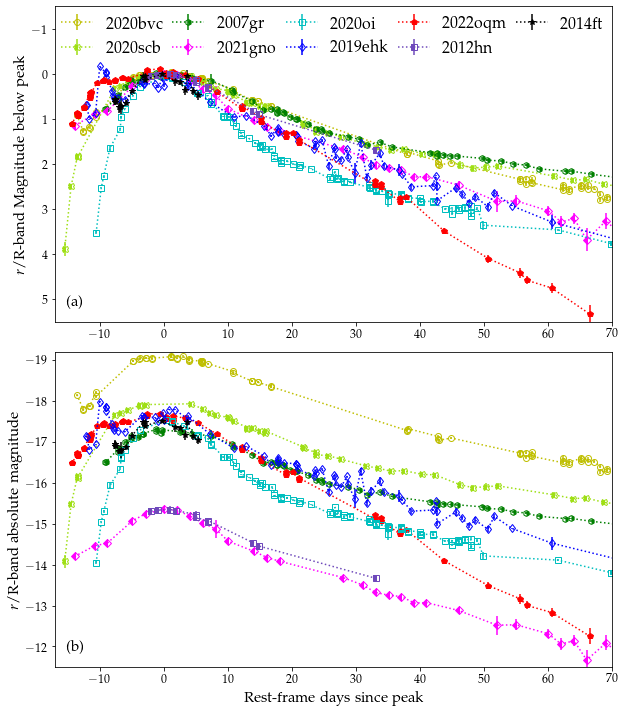

In [5]:

peak_time = {}

plt.figure(figsize = (9,10))
plt.subplot(211)
plt.text(0.02,0.05,'(a)',transform = plt.gca().transAxes,fontsize = 15)
for i,sn in enumerate(['2020bvc','2020scb','2007gr','2021gno','2020oi','2019ehk','2022oqm','2012hn','2014ft']):
    phot[sn].sort('t_rest')
    r_cond= [('r' in filt)|('R' in filt) for filt in phot[sn]['filter']]
    if sn == '2022oqm':
        r_cond= [('ZTF_r' in filt)|('r_P60' in filt) for filt in phot[sn]['filter']]
    if sn == '2021gno':
        r_cond= [('ZTF_r' in filt) for filt in phot[sn]['filter']]

    r_det = (phot[sn]['isdet'] == 'True')&r_cond
    rmax = np.min(phot[sn]['AB_MAG'][r_det])
    t_rmax = phot[sn]['t_rest'][(phot[sn]['AB_MAG'] == rmax)&r_det]
    t_close = np.abs(phot[sn]['t_rest'] - t_rmax)<10
    tsamp = np.linspace(t_rmax-10,t_rmax+10,10000)
    poly,_=polynomial_smooth(phot[sn][r_det&t_close]['t_rest'],phot[sn][r_det&t_close]['AB_MAG'],phot[sn][r_det&t_close]['AB_MAG_ERR'],n=4)
    rsamp = poly.eval(tsamp) 
    rmax_true = np.min(rsamp)
    tmax_true = tsamp[rsamp == rmax_true] 
    peak_time[sn] = tmax_true
    rmag_sub = phot[sn]['AB_MAG'][r_det]-rmax_true
    plt.errorbar(phot[sn]['t_rest'][r_det] - tmax_true, rmag_sub,phot[sn]['AB_MAG_ERR'][r_det],marker = m_sn[sn],ls = ':',color = c_sn[sn], markersize = 6, label = sn,fillstyle = f_sn[sn])
    #plt.plot(tsamp - tmax_true,rsamp-rmax_true,color = c_sn[sn],ls = ':')
plt.ylabel(r'$r$/R-band Magnitude below peak', fontsize  = 15)
legend = plt.legend(ncol=5,fontsize = 16,framealpha=0.0,loc=(0,0.82),columnspacing = 0.6)
plt.ylim((-1.5,5.5))
plt.xlim((-17,70))
plt.gca().invert_yaxis()
##plt.xlabel('Rest-frame days since peak', fontsize  = 15)
plt.tight_layout()
#plt.show(block = False)

plt.subplot(212)
plt.text(0.02,0.05,'(b)',transform = plt.gca().transAxes,fontsize = 15)
for i,sn in enumerate(['2020scb','2007gr','2022oqm','2021gno','2020oi','2019ehk','2020bvc','2012hn','2014ft']):
    phot[sn].sort('t_rest')
    r_cond= [('r' in filt)|('R' in filt) for filt in phot[sn]['filter']]
    if sn == '2022oqm':
        r_cond= [('ZTF_r' in filt)|('r_P60' in filt) for filt in phot[sn]['filter']]
    if sn == '2021gno':
        r_cond= [('ZTF_r' in filt) for filt in phot[sn]['filter']]

    r_det = (phot[sn]['isdet'] == 'True')&r_cond
    rmax = np.min(phot[sn]['AB_MAG'][r_det])
    t_rmax = phot[sn]['t_rest'][(phot[sn]['AB_MAG'] == rmax)&r_det]
    t_close = np.abs(phot[sn]['t_rest'] - t_rmax)<10
    tsamp = np.linspace(t_rmax-10,t_rmax+10,10000)
    poly,_=polynomial_smooth(phot[sn][r_det&t_close]['t_rest'],phot[sn][r_det&t_close]['AB_MAG'],phot[sn][r_det&t_close]['AB_MAG_ERR'],n=4)
    rsamp = poly.eval(tsamp) 
    rmax_true = np.min(rsamp)
    tmax_true = tsamp[rsamp == rmax_true] 
    peak_time[sn] = tmax_true
    rmag_sub = phot[sn]['AB_MAG'][r_det]-rmax_true
    plt.errorbar(phot[sn]['t_rest'][r_det] - tmax_true, phot[sn]['absmag'][r_det],phot[sn]['AB_MAG_ERR'][r_det],marker = m_sn[sn],ls = ':',color = c_sn[sn], markersize = 6, label = sn,fillstyle = f_sn[sn])
    #plt.plot(tsamp - tmax_true,rsamp-rmax_true,color = c_sn[sn],ls = ':')
plt.ylabel(r'$r$/R-band absolute magnitude', fontsize  = 15)
#plt.legend(fontsize = 15)
plt.ylim((-19.2,-11.5))
plt.xlim((-17,70))
plt.gca().invert_yaxis()
plt.xlabel('Rest-frame days since peak', fontsize  = 15)
plt.tight_layout()
plt.show(block = False)




